<a href="https://colab.research.google.com/github/rumijay/Data-Science-2025/blob/main/RumiJawad_Unit3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 3 Project: The Right Likelihood for the Job

In unit 2, we asked "what's the true proportion of ____?"

In this unit's project, we'll ask "What's the true average of \_\_\_\_?" or "What's the true amount of \_\_\__?"

**Task**:

Two parts:

1. Propose a data set that's compatible with a single variable likelihood from pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one prior, and NONE of your priors can be a beta distribtuion
- Your likelihood CANNOT be a Bernoulli distribution nor a Binomial distribution.
-distributions
the normal?
the student T?
the skew normal?
the skew student T?


import stuff


In [3]:
!pip install "preliz[full,notebook]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.5 MB/s eta 0:00:00


In [4]:
import preliz as pz

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

What is the average duration of an Uber ride in Austin, TX

Why this dataset is a good fit:

Single variable: The primary variable of interest is the ride duration, which is a continuous measure of an amount (time).


I am not going to start with a normal distribution, as I feel it's too general.

Heavy tails (Student's T): While most rides are short, a few outliers will have very long durations due to traffic incidents, accidents, airports, or special events. Using a Student's T likelihood, which is less sensitive to outliers than a normal distribution, would provide a more robust estimate of the average ride time

Skewness (Skew-Normal/Skew-Student's T): Ride durations are unlikely to be perfectly symmetric. The distribution will likely be right-skewed, with most rides clustered at shorter durations and a long tail of longer rides. A Skew-Normal or Skew-Student's T likelihood can show this asymmetry and provide a more accurate model of the data.

raw data set

light discussion on assumption os priors (what i think avg amoutn is) predict amt of smt and if i think itll be swewed

My predicted average based on raw data is 20 minutes, taking into account urban trvael times. I think the data wil be skewed, because of outliers like traffic, airport rides, accidents, etc. My prior

talk about raw data, then data stuff.

In [6]:
#T is for Student's T distribution
with pm.Model() as model_chemshiftT:
    # weak prior
    μ = pm.Uniform('μ', lower=45, upper=70)

    #the same as before
    σ = pm.HalfNormal('σ', sigma=5)

    #this is our normality parameter; lam = 1/30 gives a mean of 30
    ν = pm.Exponential('ν', lam = 1/30)

    #new likelihood, same data
    y = pm.StudentT('y', mu=μ, sigma=σ, nu = ν, observed=data_chemshift)
    idata_chemshiftT = pm.sample()

NameError: name 'data_chemshift' is not defined

In [ ]:
#ST is for skew T
with pm.Model() as model_ubershiftST:
    #same weak prior
    μ = pm.Uniform('μ', lower=45, upper=70)

    #same as before
    σ = pm.HalfNormal('σ', sigma=5)

    #when a is larger than b, the dist. is positively skewed
    a = pm.HalfNormal('a', sigma=7)
    b = pm.HalfNormal('b', sigma=1)

    #SkewStudentR, which is the same as a T, except with more unusually high
    #or unusually low values.
    y = pm.SkewStudentT('y',mu=μ, sigma=σ, a = a, b = b, observed=uber_ride)
    uber_ridetST = pm.sample()

In [ ]:
#with pm.Model() as model_UberRide:


<Axes: >

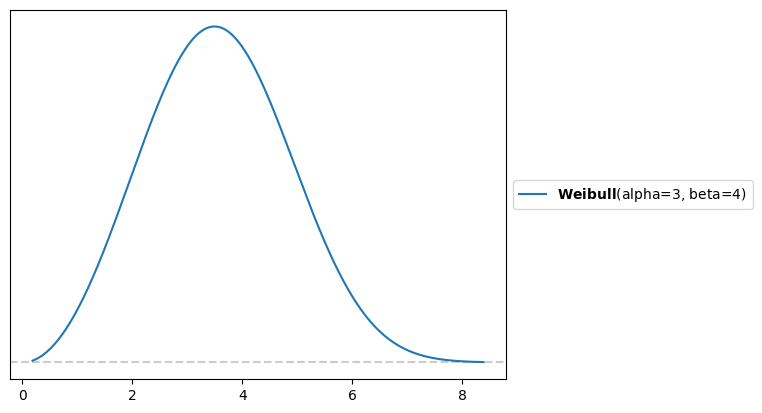

In [10]:
pz.Weibull(alpha=3, beta=4).plot_pdf()

reference diff distributions and curves and skews and analyze (u can start with a normal likelihood but def mention its a good starter, then use a diff distribution)

I

talk about how ur priors r represented, most distributions usually have 2+ priors. u need a prior for each

orange graph - talk abouta ttempt and curve- lines depend on data

then after try a diff likelihood with diff priors

final comments and conclusion

give me a proposed data set idea good for thos